# Trabajo Práctico 2

1. Implemente un perceptrón simple que aprenda la función lógica AND y la función
lógica OR, de 2 y de 4 entradas. Muestre la evolución del error durante el
entrenamiento. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos
los vectores de entrada de la red

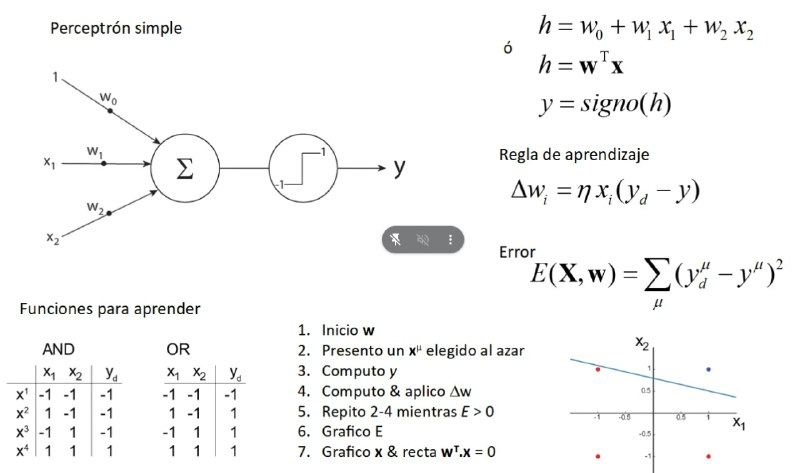

In [1]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return
 
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 para el término de sesgo
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.errors = []  # Lista para almacenar el error por época
    
    def activation_function(self, x):
        return 1 if x > 0 else -1
    
    def predict(self, x):
        # Insertamos el bias en la entrada x y calculamos la salida z
        z = np.dot(self.weights.T, np.insert(x, 0, 1))  # Insertamos 1 para el término de sesgo
        return self.activation_function(z)
    
    def ECM(self, yd, y_pred):
        # Calcula el error cuadrático medio para la época
        error = sum((yd - y_pred) ** 2 for yd, y_pred in zip(yd, y_pred)) / len(yd)
        return error

    def fit(self, X, y, plot_graph=True):
        for epoch in range(self.epochs):
            indexes = np.random.permutation(len(y))
            for index in indexes:
                # Predicción para cada ejemplo
                prediction = self.predict(X[index])
                # Ajuste de pesos
                self.weights[1:] += self.learning_rate * (y[index] - prediction) * X[index]
                self.weights[0] += self.learning_rate * (y[index] - prediction)  # Sesgo o bias
            
            # Predicciones para todo el conjunto X después de la actualización
            y_pred = [self.predict(xi) for xi in X]
            # Cálculo del error para la época
            error_epoch = self.ECM(y, y_pred)
            self.errors.append(error_epoch)
            
            # Condición de parada si el error es 0
            if error_epoch == 0:
                break

        # Graficar si plot_graph es True
        if plot_graph:
            plt.plot(range(1, len(self.errors) + 1), self.errors, 'ro-')
            plt.xlabel('Época')
            plt.ylabel('Error')
            plt.title('Error vs Época')
            plt.show()

    def fit_nograph(self, X, y):
        # Llamada a fit con plot_graph=False para evitar la gráfica
        self.fit(X, y, plot_graph=False)     


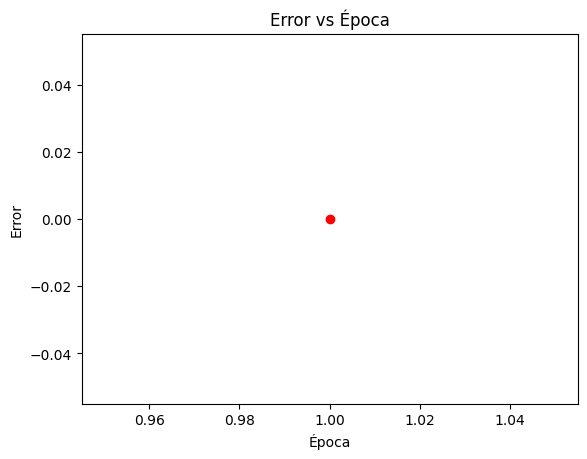

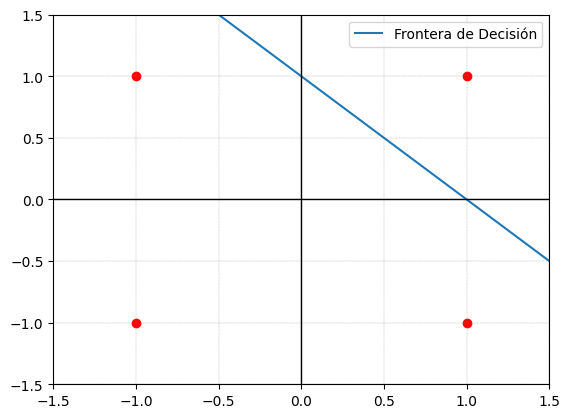

In [2]:
x_and = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_and = np.array([-1, -1, -1, 1])
perceptron_and = Perceptron(2)
perceptron_and.fit(x_and, y_and)
plt.figure()
plt.scatter(x_and[:, 0], x_and[:, 1], c="red")
x_values = np.linspace(-3, 3, 100)
y_values = -(perceptron_and.weights[1] * x_values + perceptron_and.weights[0]) / perceptron_and.weights[2]
plt.plot(x_values, y_values, label='Frontera de Decisión')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()


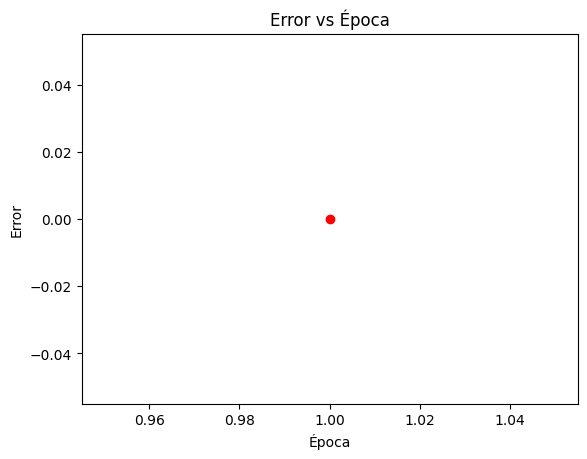

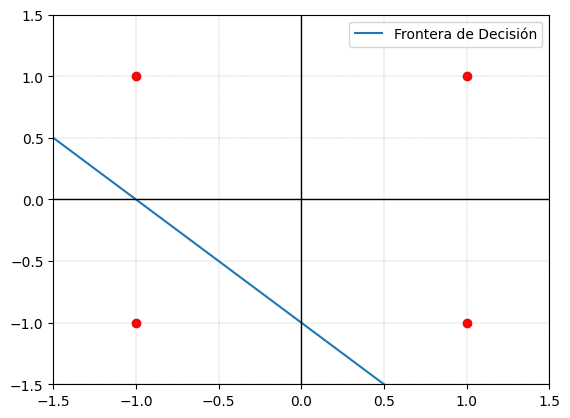

In [3]:
x_or = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_or = np.array([-1, 1, 1, 1])
perceptron_or = Perceptron(2)
perceptron_or.fit(x_or, y_or)
plt.figure()
plt.scatter(x_or[:, 0], x_or[:, 1], c="red")
x_values = np.linspace(-3, 3, 100)
y_values = -(perceptron_or.weights[1] * x_values + perceptron_or.weights[0]) / perceptron_or.weights[2]
plt.plot(x_values, y_values, label='Frontera de Decisión')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()




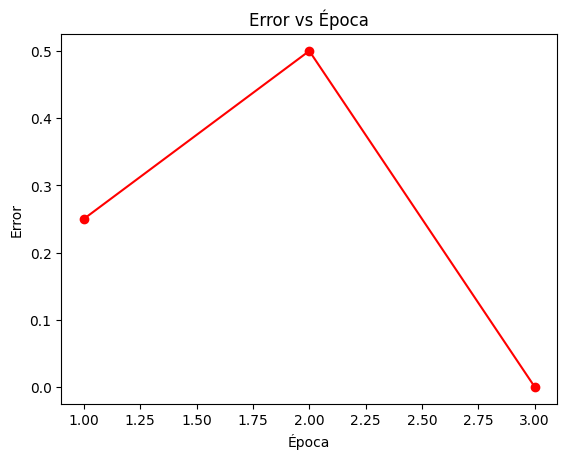

In [4]:
import itertools

permutations = list(itertools.product([True, False], repeat=4))
y4_and = []
for p in permutations:
    if p[0] and p[1] and p[2] and p[3]:
        y4_and.append(1)
    else:
        y4_and.append(-1)

x4_and = np.array(permutations)
x4_and = np.where(x4_and, 1, -1)

perceptron_4_and = Perceptron(4)
perceptron_4_and.fit(x4_and, y4_and)


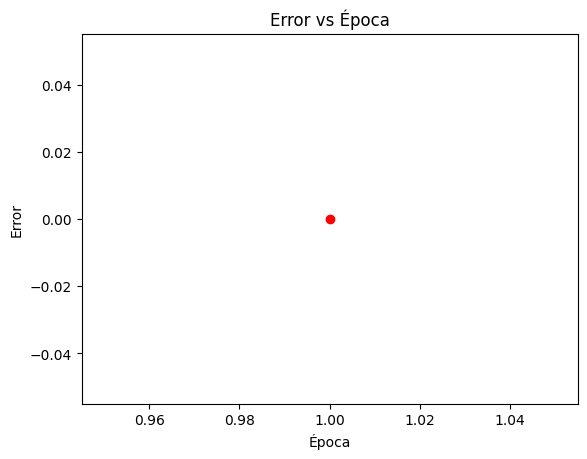

In [5]:
x4_or = x4_and.copy()
y4_or = []
for p in permutations:
    if p[0] or p[1] or p[2] or p[3]:
        y4_or.append(1)
    else:
        y4_or.append(-1)

perceptron_4_or = Perceptron(4)
perceptron_4_or.fit(x4_or, y4_or)



2) Determine numéricamente cómo varía la capacidad del perceptrón simple en función
del número de patrones enseñados.

In [6]:
%%skip
dims = [5, 10, 15, 20, 25]
Np = 60
Ntot = 80
maxEpochs = 100
jump = 5
naps = []
for patDim in dims:
    Nap = np.zeros(Np)
    for i in range(1, Np, jump):
        for n in range(Ntot):
            patterns = np.random.uniform(-1, 1, (i, patDim))
            yd = np.random.choice([-1, 1], i)
            perceptron = Perceptron(patDim)
            for epoch in range(maxEpochs):
                if perceptron.ECM(yd, [perceptron.predict(xi) for xi in patterns]) == 0:
                    Nap[i//jump]+=1
                    break
                perceptron.fit_nograph(patterns, yd)
    naps.append(Nap)                

In [7]:
%%skip
x_range = np.arange(0, jump * Np, jump)
for i in range(len(dims)):
    plt.plot(x_range, naps[i] / Ntot,label=f'N = {dims[i]}')

plt.xlim(0, Np+10)
plt.axhline(y= 0.5, color='r', linestyle='--', linewidth = 0.7)   
plt.xlabel('Cantidad de patrones')
plt.ylabel('Tasa de aprendizaje')
plt.title('Capacidad del Perceptrón')
plt.legend()
plt.show()



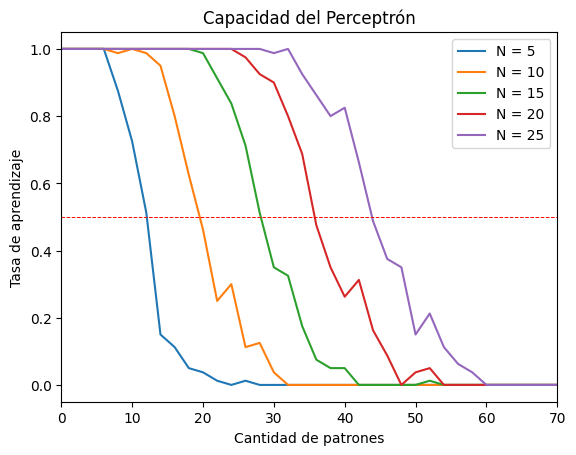

In [8]:
class Perceptron2:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        # El peso incluye +1 para el término de sesgo
        self.weights = np.random.randn(input_size + 1)  
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def activation_function(self, x):
        return np.tanh(x)  # Función de activación tanh
    
    def activation_function_derivative(self, x):
        return 1 - np.tanh(x) ** 2  # Derivada de tanh
    
    def predict(self, x):
        # Agregamos el sesgo en la entrada
        x = np.insert(x, 0, 1)  
        z = np.dot(self.weights, x) 
        return self.activation_function(z)
    
    def update_weights(self, x, error):
        # Agregamos el sesgo en la entrada
        x = np.insert(x, 0, 1)  
        self.weights += self.learning_rate * error * x

class MultiLayerPerceptron:
    def __init__(self, layer_sizes, learning_rate=0.1, epochs=1000):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = []
        self.biases = []
        self.errors = []
        self.test_errors = []
        self.initialize_weights()

    def initialize_weights(self):
        for i in range(len(self.layer_sizes) - 1):
            weight = np.random.randn(self.layer_sizes[i], self.layer_sizes[i + 1])
            bias = np.random.randn(self.layer_sizes[i + 1])
            self.weights.append(weight)
            self.biases.append(bias)


    def fit(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                self.update_weights(xi, target)
    def fit_with_graph(self, X, y, min_error=0.002):  
        for _ in range(self.epochs):
            error_epoch = 0
            
            for xi, target in zip(X, y):
                self.update_weights(xi, target)
                y_pred = self.predict(xi)
                
                error_epoch += np.sum((target - y_pred) ** 2)
                
            self.errors.append(error_epoch / len(y))
            
            if error_epoch / len(y) < min_error:
                break
        plt.plot(self.errors, label='Training Error')
        
        plt.xlabel('Epochs')
        plt.ylabel('Total Error')
        plt.title('Error vs. Epochs')
        plt.legend()
        plt.show()                    
    def fit_with_graph_vs_test(self, X, y, X_test, y_test, min_error=0.002, batch_size = 1):  
        for _ in range(self.epochs):
            for start in range (0, len(y), batch_size):
                x_batch = X[start:start+batch_size]
                y_batch = y[start:start+batch_size]

                error_epoch = 0
                error_test_epoch = 0
                for xi, target, xt, test_target in zip(x_batch, y_batch, X_test, y_test):
                    self.update_weights(xi, target)
                    y_pred = self.predict(xi)
                    y_pred_test = self.predict(xt)
                    error_epoch += np.sum((target - y_pred) ** 2)
                    error_test_epoch += np.sum((test_target - y_pred_test) ** 2)
            self.errors.append(error_epoch / len(y))
            self.test_errors.append(error_test_epoch / len(y_test))
            if error_epoch / len(y_test) < min_error:
                break
        plt.plot(self.errors, label='Training Error')
        plt.plot(self.test_errors, label='Test Error')
        plt.xlabel('Epochs')
        plt.ylabel('Total Error')
        plt.title('Error vs. Epochs')
        plt.legend()
        plt.show()

    def update_weights(self, xi, target):
        activations = [xi]
        inputs = xi
        # Colecciono las activaciones de las capas
        for weight, bias in zip(self.weights, self.biases):
            inputs = np.dot(inputs, weight) + bias
            inputs = np.tanh(inputs)
            activations.append(inputs)

        # Backpropagation
        error = target - activations[-1]
        deltas = [error * (1 - activations[-1] ** 2)]

        for i in range(len(self.weights) - 2, -1, -1):
            delta = np.dot(deltas[-1], self.weights[i + 1].T) * (1 - activations[i + 1] ** 2)
            deltas.append(delta)

        deltas.reverse()

        for i in range(len(self.weights)):
            self.weights[i] += self.learning_rate * np.outer(activations[i], deltas[i])
            self.biases[i] += self.learning_rate * deltas[i]


    def predict(self, X):
        inputs = X
        for i, (weight, bias) in enumerate(zip(self.weights, self.biases)):
            inputs = np.dot(inputs, weight) + bias
            if i < len(self.weights) - 1:
                inputs = np.tanh(inputs)  # tanh para capas ocultas
            # salida sin función de activación para la capa de salida
        return inputs

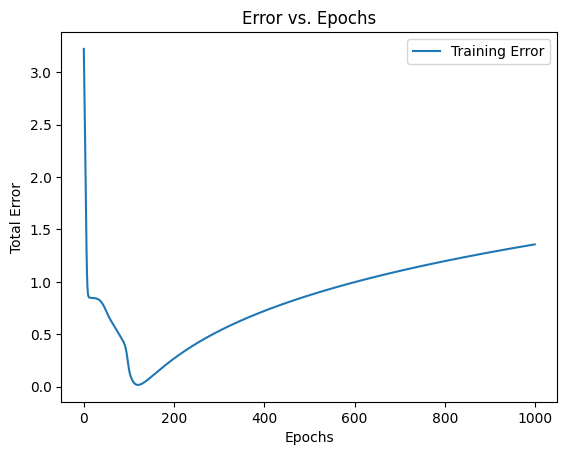

Entrada: [0 0], Predicción: -1
Entrada: [0 1], Predicción: 1
Entrada: [1 0], Predicción: 1
Entrada: [1 1], Predicción: -1


In [9]:

# Configuración para XOR de 2 entradas
mlp = MultiLayerPerceptron(layer_sizes=[2,4,10,2,1], learning_rate=0.05, epochs=1000)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Entradas XOR
y = np.array([-1, 1, 1, -1])  # Salidas XOR deseadas (para tanh)

# Entrenamiento y evaluación
mlp.fit_with_graph(X, y)

# Predicciones después del entrenamiento
for x in X:
    prediction = mlp.predict(x)
    rounded_prediction = 1 if prediction >= 0 else -1
    print(f"Entrada: {x}, Predicción: {rounded_prediction}")

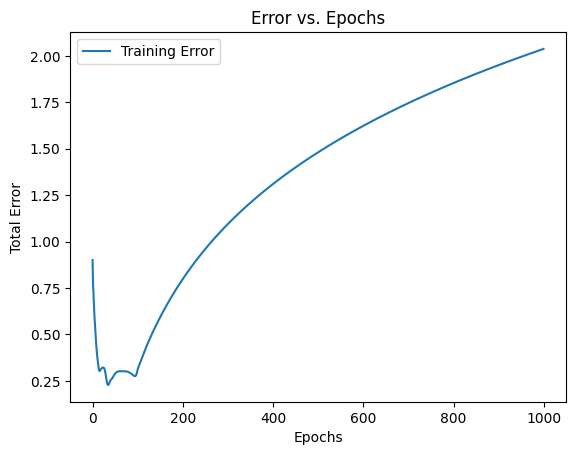

Entrada: [0 0 0 0], Predicción: -1
Entrada: [0 0 0 1], Predicción: 1
Entrada: [0 0 1 0], Predicción: 1
Entrada: [0 0 1 1], Predicción: -1
Entrada: [0 1 0 0], Predicción: 1
Entrada: [0 1 0 1], Predicción: -1
Entrada: [0 1 1 0], Predicción: -1
Entrada: [0 1 1 1], Predicción: 1
Entrada: [1 0 0 0], Predicción: 1
Entrada: [1 0 0 1], Predicción: -1
Entrada: [1 0 1 0], Predicción: -1
Entrada: [1 0 1 1], Predicción: 1
Entrada: [1 1 0 0], Predicción: -1
Entrada: [1 1 0 1], Predicción: 1
Entrada: [1 1 1 0], Predicción: 1
Entrada: [1 1 1 1], Predicción: -1


In [10]:
# Configuración para XOR de 4 entradas
mlp2 = MultiLayerPerceptron(layer_sizes=[4,4,10,5,1], learning_rate=0.05, epochs=1000)
X2 = np.array([[0, 0, 0, 0], 
               [0, 0, 0, 1], 
               [0, 0, 1, 0], 
               [0, 0, 1, 1], 
               [0, 1, 0, 0], 
               [0, 1, 0, 1], 
               [0, 1, 1, 0], 
               [0, 1, 1, 1], 
               [1, 0, 0, 0], 
               [1, 0, 0, 1], 
               [1, 0, 1, 0], 
               [1, 0, 1, 1], 
               [1, 1, 0, 0], 
               [1, 1, 0, 1], 
               [1, 1, 1, 0], 
               [1, 1, 1, 1]])  # Entradas XOR
y2 = np.array([-1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1])  # Salidas XOR deseadas (para tanh)

mlp2.fit_with_graph(X2, y2)

for x2 in X2:
    prediction2 = mlp2.predict(x2)
    rounded_prediction2 = 1 if prediction2 >= 0 else -1
    print(f"Entrada: {x2}, Predicción: {rounded_prediction2}")

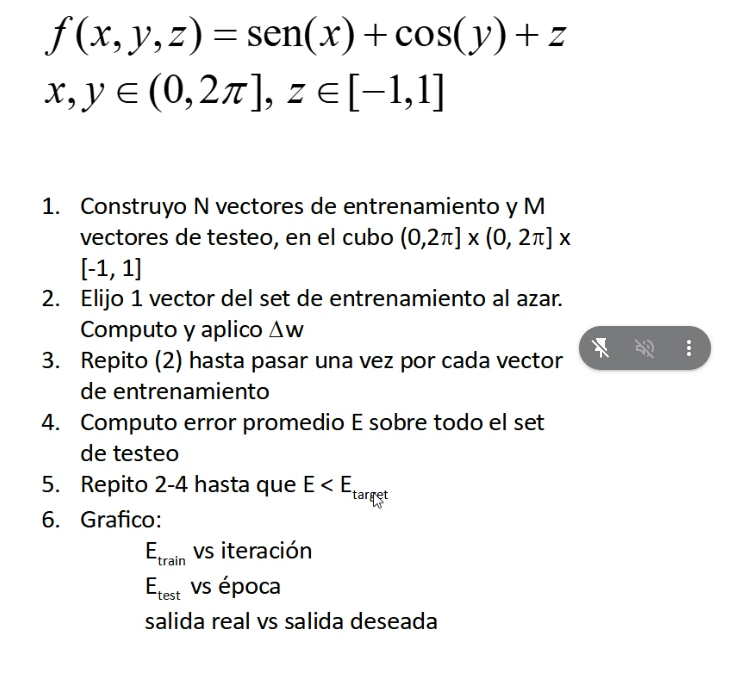

<!--[image.png](attachment:image.png)-->


In [11]:

prop_test = 0.2
cantidad_vectores = 500
def funcion_especifica(coords):
    return np.sin(coords[0]) + np.cos(coords[1]) + coords[2]


vectores_train = np.array([[np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), np.random.uniform(-1, 1)] for _ in range(int(cantidad_vectores*(1-prop_test)))])
vectores_test = np.array([[np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), np.random.uniform(-1, 1)] for _ in range(int(cantidad_vectores*prop_test))])

y_train = np.array([funcion_especifica(v) for v in vectores_train])
y_test = np.array([funcion_especifica(v) for v in vectores_test])


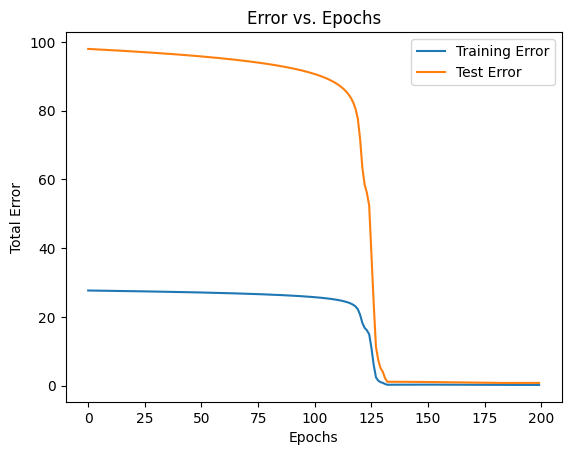

In [12]:
mlp3 = MultiLayerPerceptron(layer_sizes=[3, 50, 1], learning_rate=0.01, epochs=200)
mlp3.fit_with_graph_vs_test(vectores_train, y_train, vectores_test, y_test, min_error=0, batch_size= cantidad_vectores)

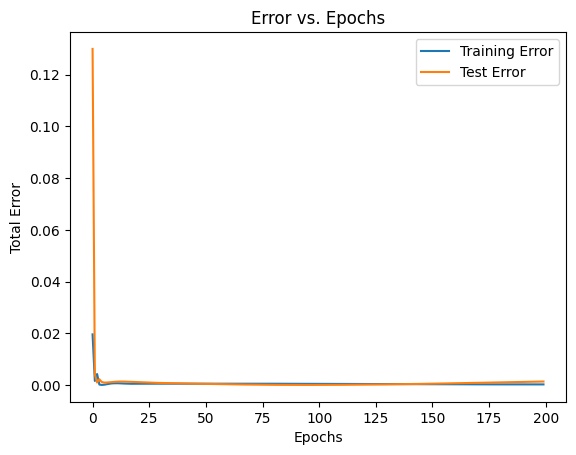

In [13]:
mlp4 = MultiLayerPerceptron(layer_sizes=[3, 50, 1], learning_rate=0.005, epochs=200)
mlp4.fit_with_graph_vs_test(vectores_train, y_train, vectores_test, y_test, min_error=0, batch_size=1)

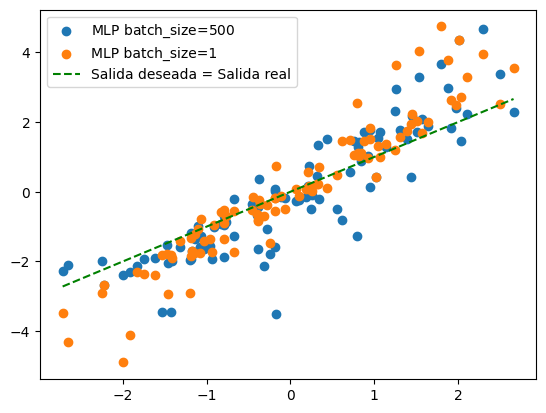

In [14]:
ypred3 = mlp3.predict(vectores_test)
ypred4 = mlp4.predict(vectores_test)

plt.scatter(y_test, ypred3, label=f'MLP batch_size=${cantidad_vectores}$')
plt.scatter(y_test, ypred4, label='MLP batch_size=1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', label='Salida deseada = Salida real')
plt.legend()
plt.show()

In [15]:
import scipy.io as sio
datos_train = sio.loadmat('RBM/datosTrain.mat')["data"]/255
datos_test = sio.loadmat('RBM/datosTest.mat')["data"]/255

In [16]:
class RBM:
    def __init__(self, visible_units, hidden_units, learning_rate=0.1, epochs=1000):
        self.visible_units = visible_units
        self.hidden_units = hidden_units
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.randn(visible_units, hidden_units) * 0.1
        self.visible_bias = np.zeros(visible_units)
        self.hidden_bias = np.zeros(hidden_units)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def train(self, data):
        for epoch in range(self.epochs):
            for sample in data:
                # Fase positiva
                positive_hidden_probs = self.sigmoid(np.dot(sample, self.weights) + self.hidden_bias)
                positive_hidden_states = (positive_hidden_probs > np.random.rand(self.hidden_units)).astype(float)
                positive_associations = np.outer(sample, positive_hidden_probs)
                
                # Fase negativa
                negative_visible_probs = self.sigmoid(np.dot(positive_hidden_states, self.weights.T) + self.visible_bias)
                negative_hidden_probs = self.sigmoid(np.dot(negative_visible_probs, self.weights) + self.hidden_bias)
                negative_associations = np.outer(negative_visible_probs, negative_hidden_probs)
                
                # Actualización de pesos y sesgos
                self.weights += self.learning_rate * (positive_associations - negative_associations)
                self.visible_bias += self.learning_rate * (sample - negative_visible_probs)
                self.hidden_bias += self.learning_rate * (positive_hidden_probs - negative_hidden_probs)
            
            
            error = np.mean((data - self.reconstruct(data)) ** 2)
            ## print(f'Epoch {epoch + 1}/{self.epochs}, Reconstruction Error: {error}')
    
    def reconstruct(self, data):
        hidden_probs = self.sigmoid(np.dot(data, self.weights) + self.hidden_bias)
        visible_probs = self.sigmoid(np.dot(hidden_probs, self.weights.T) + self.visible_bias)
        return visible_probs

In [22]:
# Example usage
rbm = RBM(visible_units=datos_train.shape[1], hidden_units=120, learning_rate=0.1, epochs=100)
rbm.train(datos_train)

# Reconstruct the test data
reconstructed_data = rbm.reconstruct(datos_test)
#print(reconstructed_data)



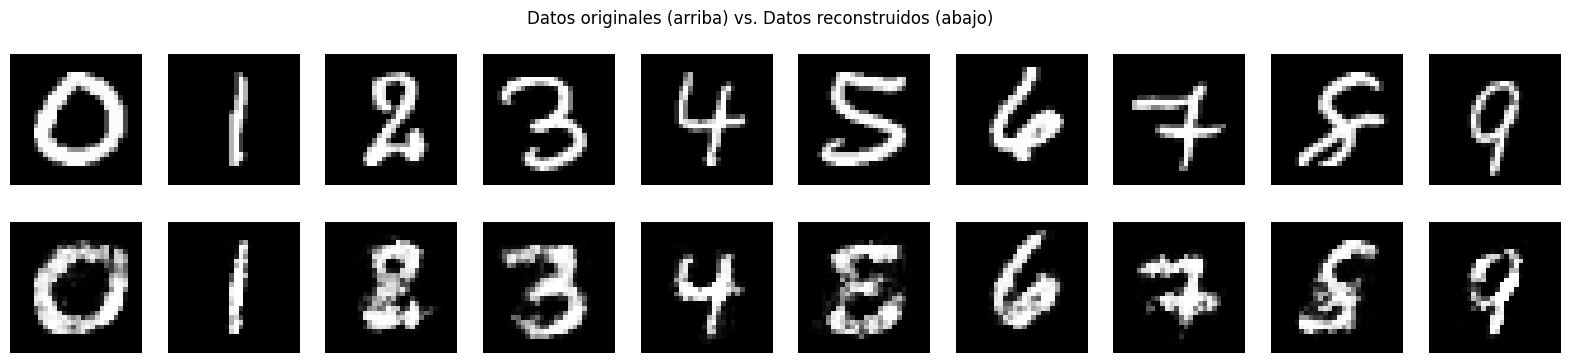

In [30]:
reconstructed_data = reconstructed_data.reshape(-1, 28, 28)
fig, axes = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    axes[1, i].imshow(reconstructed_data[i*20], cmap='gray')
    axes[1, i].axis('off')
    

    axes[0, i].imshow(datos_test[i * 20].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
fig.suptitle('Datos originales (arriba) vs. Datos reconstruidos (abajo)')
plt.show()